In [1]:
# 1 Import functions
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.extract import fetch_movies
from src.transform import transform_movies

# 2️ Extract raw data
wanted_movies = fetch_movies() 

# 3️ Transform into DataFrame
wanted_data = transform_movies(wanted_movies)  



In [2]:
wanted_data['id']


0     299534
1      19995
2     140607
3     299536
4        597
5     135397
6     420818
7      24428
8     168259
9      99861
10    284054
11     12445
12    181808
13    330457
14    351286
15    109445
16    321612
17    260513
Name: id, dtype: int64

In [3]:
wanted_data.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director',
       'crew_size'],
      dtype='object')

In [4]:
#2:4 Inspecting to identify anomalies in extracted columns
columns_to_check = [ 'belongs_to_collection','genres','spoken_languages','production_countries','production_companies']

for column in columns_to_check:
    print(f"{column} ")
    
    
    missing_count = wanted_data[column].isna().sum()
    print(f"Missing : {missing_count}")
    
    

    print("Top values:")
    print(wanted_data[column].value_counts().head(2))


belongs_to_collection 
Missing : 2
Top values:
belongs_to_collection
The Avengers Collection    4
Star Wars Collection       2
Name: count, dtype: int64
genres 
Missing : 0
Top values:
genres
Adventure|Action|Science Fiction             3
Action|Adventure|Science Fiction|Thriller    2
Name: count, dtype: int64
spoken_languages 
Missing : 0
Top values:
spoken_languages
English         9
English|日本語|    1
Name: count, dtype: int64
production_countries 
Missing : 0
Top values:
production_countries
United States of America                   16
United States of America|United Kingdom     1
Name: count, dtype: int64
production_companies 
Missing : 0
Top values:
production_companies
Marvel Studios                   5
Walt Disney Animation Studios    2
Name: count, dtype: int64


In [5]:
wanted_data.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,$356.0M,$2799.4M,Marvel Studios,...,8,16,181,After the devastating events of Avengers: Infi...,English|日本語|,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...",106,Joe Russo,607
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,$237.0M,$2923.7M,Dune Entertainment|Lightstorm Entertainment|20...,...,7,51,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...",67,James Cameron,990


In [6]:
wanted_data.dtypes

id                                int64
title                            object
tagline                          object
release_date             datetime64[ns]
genres                           object
belongs_to_collection            object
original_language                object
budget_musd                      object
revenue_musd                     object
production_companies             object
production_countries             object
vote_count                        int64
vote_average                      int64
popularity                        int64
runtime                           int64
overview                         object
spoken_languages                 object
poster_path                      object
cast                             object
cast_size                         int64
director                         object
crew_size                         int64
dtype: object

KPI Implementation and Aanalysis

In [7]:
wanted_data_toClean = ['budget_musd', 'revenue_musd']


for column in wanted_data_toClean:
    wanted_data[column + '_num'] = wanted_data[column].str.replace('$', '', regex=False) .str.replace('M', '', regex=False) .astype(float)





In [8]:
highest_revenue = wanted_data.loc[wanted_data['revenue_musd_num'].idxmax()]
print("Highest Revenue:")
print(highest_revenue[['title', 'revenue_musd_num']])


Highest Revenue:
title               Avatar
revenue_musd_num    2923.7
Name: 1, dtype: object


In [9]:
highest_budget = wanted_data.loc[wanted_data['budget_musd_num'].idxmax()]
print("Highest Budget:")
print(highest_budget[['title', 'budget_musd_num']])


Highest Budget:
title              Avengers: Endgame
budget_musd_num                356.0
Name: 0, dtype: object


In [10]:
wanted_data['profit_musd'] = wanted_data['revenue_musd_num'] - wanted_data['budget_musd_num']

highest_profit_idx = wanted_data['profit_musd'].idxmax()
highest_profit_movie = wanted_data.loc[highest_profit_idx]


print("Highest Profit Movie:")
print(highest_profit_movie[['title', 'profit_musd']])


Highest Profit Movie:
title          Avatar
profit_musd    2686.7
Name: 1, dtype: object


In [11]:
wanted_data['profit_musd'] = wanted_data['revenue_musd_num'] - wanted_data['budget_musd_num']

lowest_profit_idx = wanted_data['profit_musd'].idxmin()
lowest_profit_movie = wanted_data.loc[lowest_profit_idx]


print("Lowest Profit Movie:")
print(lowest_profit_movie[['title', 'profit_musd']])

Lowest Profit Movie:
title          Star Wars: The Last Jedi
profit_musd                      1032.7
Name: 12, dtype: object


In [12]:
budget_filter = wanted_data['budget_musd_num'] >= 10
wanted_data['roi'] = wanted_data['revenue_musd_num'] - wanted_data['budget_musd_num']/ wanted_data['budget_musd_num']

highest_roi = wanted_data.loc[budget_filter]['roi'].idxmax()
print("Highest ROI Movie:", wanted_data.loc[highest_roi][['title', 'roi']])


lowest_roi = wanted_data.loc[budget_filter]['roi'].idxmin()
print("Lowest ROI Movie:", wanted_data.loc[lowest_roi][['title', 'roi']])


Highest ROI Movie: title    Avatar
roi      2922.7
Name: 1, dtype: object
Lowest ROI Movie: title    Incredibles 2
roi             1242.2
Name: 17, dtype: object


In [13]:
most_voted = wanted_data.loc[wanted_data['vote_count'].idxmax()]
print("Most Voted Movie:")
print(most_voted[['title', 'vote_count']])


Most Voted Movie:
title         The Avengers
vote_count           34422
Name: 7, dtype: object


In [14]:
high_rated = wanted_data.loc[wanted_data[wanted_data['vote_count'] >= 10]['vote_average'].idxmax()]
print("Highest Rated Movie (≥10 votes):")
print(high_rated[['title', 'vote_average']])


Highest Rated Movie (≥10 votes):
title           Avengers: Endgame
vote_average                    8
Name: 0, dtype: object


In [15]:
low_rated = wanted_data.loc[wanted_data[wanted_data['vote_count'] >= 10]['vote_average'].idxmin()]
print("Lowest Rated Movie (≥10 votes):")
print(low_rated[['title', 'vote_average']])


Lowest Rated Movie (≥10 votes):
title           Jurassic World
vote_average                 6
Name: 5, dtype: object


In [16]:
most_popular = wanted_data.loc[wanted_data['popularity'].idxmax()]
print("Most Popular Movie:")
print(most_popular[['title', 'popularity']])


Most Popular Movie:
title         Avatar
popularity        51
Name: 1, dtype: object


In [17]:
def movie_kpis(df):
   
    df['profit_musd'] = df['revenue_musd_num'] - df['budget_musd_num']
    
    
    kpi_map = {
        "Highest Revenue": ('revenue_musd_num', True, None, None),
        "Highest Budget": ('budget_musd_num', True, None, None),
        "Highest Profit": ('profit_musd', True, None, None),
        "Lowest Profit": ('profit_musd', False, None, None),
        "Highest ROI (Budget ≥10M)": ('roi', True, 'budget_musd_num', 10),
        "Lowest ROI (Budget ≥10M)": ('roi', False, 'budget_musd_num', 10),
        "Most Voted": ('vote_count', True, None, None),
        "Highest Rated (Votes ≥10)": ('vote_average', True, 'vote_count', 10),
        "Lowest Rated (Votes ≥10)": ('vote_average', False, 'vote_count', 10),
        "Most Popular": ('popularity', True, None, None)
    }
    
    results = []

    
    for kpi_name, (col, highest, filter_col, filter_val) in kpi_map.items():
        
        temp = df if filter_col is None else df[df[filter_col] >= filter_val]

        
        idx = temp[col].idxmax() if highest else temp[col].idxmin()

        
        results.append({
            "KPI": kpi_name,
            "Movie": temp.loc[idx, 'title'],
            "Value": temp.loc[idx, col]
        })
    
    return pd.DataFrame(results)


In [18]:
kpi_df = movie_kpis(wanted_data)
kpi_df

,KPI,Movie,Value
0,Highest Revenue,Avatar,2923.7
1,Highest Budget,Avengers: Endgame,356.0
2,Highest Profit,Avatar,2686.7
3,Lowest Profit,Star Wars: The Last Jedi,1032.7
4,Highest ROI (Budget ≥10M),Avatar,2922.7
5,Lowest ROI (Budget ≥10M),Incredibles 2,1242.2
6,Most Voted,The Avengers,34422.0
7,Highest Rated (Votes ≥10),Avengers: Endgame,8.0
8,Lowest Rated (Votes ≥10),Jurassic World,6.0
9,Most Popular,Avatar,51.0


In [19]:
search1 = wanted_data[
    wanted_data['cast'].apply(lambda x: "Bruce Willis" in x if isinstance(x, list) else False) &
    wanted_data['genres'].str.contains("Science Fiction") &
    wanted_data['genres'].str.contains("Action")
].sort_values("vote_average", ascending=False)

print(search1[['title', 'genres', 'cast', 'vote_average']])


Empty DataFrame
Columns: [title, genres, cast, vote_average]
Index: []


In [20]:
search2 = wanted_data[
    wanted_data['cast'].apply(lambda x: "Uma Thurman" in x if isinstance(x, list) else False) &
    (wanted_data['director'] == "Quentin Tarantino")
].sort_values("runtime", ascending=True)

print(search2[['title', 'director', 'cast', 'runtime']])


Empty DataFrame
Columns: [title, director, cast, runtime]
Index: []


In [21]:
#Franchise vs standalone movie performance
wanted_data['movie_type'] = wanted_data['belongs_to_collection'].apply(lambda x: 'Franchise' if pd.notnull(x) else 'Standalone')

metrics = ['revenue_musd_num', 'roi', 'budget_musd_num', 'popularity', 'vote_average']


comparison = wanted_data.groupby('movie_type')[metrics].agg(
    Mean_Revenue=('revenue_musd_num', 'mean'), Median_ROI=('roi', 'median'),Mean_Budget=('budget_musd_num', 'mean'), Mean_Popularity=('popularity', 'mean'), Mean_Rating=('vote_average', 'mean')
)


comparison

,Mean_Revenue,Median_ROI,Mean_Budget,Mean_Popularity,Mean_Rating
movie_type,,,,,
Franchise,1682.65625,1483.55,218.0,17.625,7.0
Standalone,1765.15000,1764.15,180.0,19.500,6.5


In [22]:
franchise_data = wanted_data[wanted_data['belongs_to_collection'].notnull()].copy()


franchise_stats = franchise_data.groupby('belongs_to_collection').agg(
    Total_Movies=('title', 'count'),Total_Budget=('budget_musd_num', 'sum'),Mean_Budget=('budget_musd_num', 'mean'),Total_Revenue=('revenue_musd_num', 'sum'), Mean_Revenue=('revenue_musd_num', 'mean'), Mean_Rating=('vote_average', 'mean')
)

franchise_stats = franchise_stats.sort_values(by='Total_Revenue', ascending=False)


franchise_stats.round(2)

,Total_Movies,Total_Budget,Mean_Budget,Total_Revenue,Mean_Revenue,Mean_Rating
belongs_to_collection,,,,,,
The Avengers Collection,4,1111.0,277.75,7776.0,1944.00,7.5
Star Wars Collection,2,545.0,272.50,3400.9,1700.45,6.5
Jurassic Park Collection,2,320.0,160.00,2982.0,1491.00,6.0
Avatar Collection,1,237.0,237.00,2923.7,2923.70,7.0
Frozen Collection,2,300.0,150.00,2727.9,1363.95,7.0
The Lion King (Reboot) Collection,1,260.0,260.00,1662.0,1662.00,7.0
The Fast and the Furious Collection,1,190.0,190.00,1515.4,1515.40,7.0
Black Panther Collection,1,200.0,200.00,1349.9,1349.90,7.0
Harry Potter Collection,1,125.0,125.00,1341.5,1341.50,8.0


In [23]:
def best_directors(wanted_data):
    director_stats = wanted_data.groupby('director').agg(
        total_movies=('title', 'count'),
        total_revenue=('revenue_musd_num', 'sum'),
        mean_rating=('vote_average', 'mean')
    ).reset_index()


    top_movies = director_stats.sort_values('total_movies', ascending=False).iloc[0]['director']
    top_revenue = director_stats.sort_values('total_revenue', ascending=False).iloc[0]['director']
    top_rating = director_stats.sort_values('mean_rating', ascending=False).iloc[0]['director']


    return top_movies, top_revenue, top_rating


In [25]:
movies_director, revenue_director, rating_director = best_directors(wanted_data)

print("Director with Most Movies:", movies_director)
print("Director with Highest Revenue:", revenue_director)
print("Director with Highest Mean Rating:", rating_director)


Director with Most Movies: Joss Whedon
Director with Highest Revenue: James Cameron
Director with Highest Mean Rating: Anthony Russo


In [26]:
wanted_data.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director',
       'crew_size', 'budget_musd_num', 'revenue_musd_num', 'profit_musd',
       'roi', 'movie_type'],
      dtype='object')

Visualization


In [27]:
import matplotlib.pyplot as plt

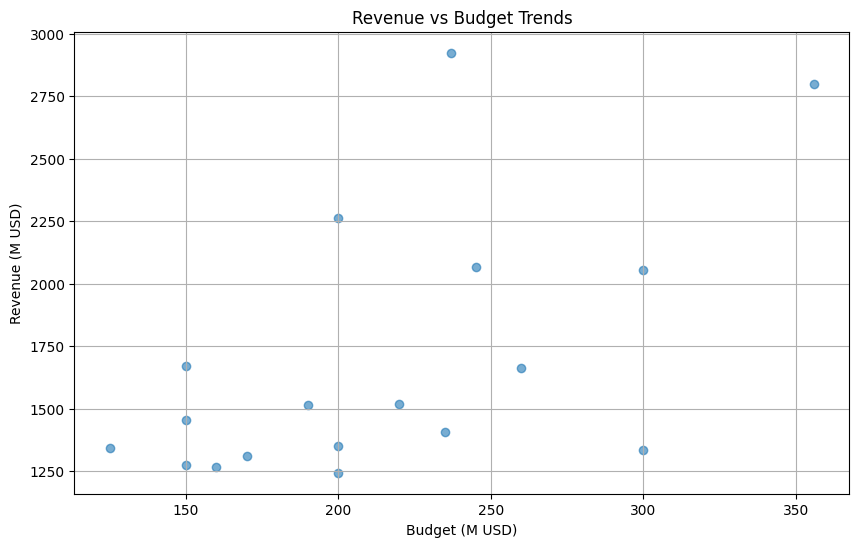

In [28]:

plt.figure(figsize=(10,6))
plt.scatter(wanted_data['budget_musd_num'], wanted_data['revenue_musd_num'], alpha=0.6)
plt.xlabel('Budget (M USD)')
plt.ylabel('Revenue (M USD)')
plt.title('Revenue vs Budget Trends')
plt.grid(True)
plt.show()


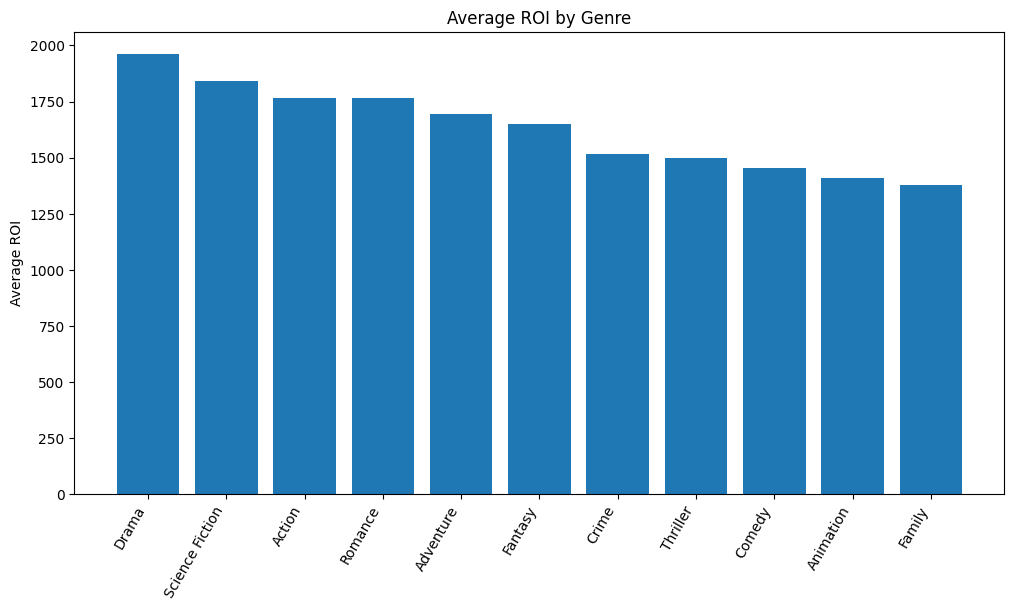

In [29]:

wanted_data['genre_list'] = wanted_data['genres'].apply(lambda x: x.split("|") if isinstance(x, str) else [])

genre_roi = wanted_data.explode('genre_list')

avg_roi = genre_roi.groupby('genre_list')['roi'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(avg_roi.index, avg_roi.values)
plt.xticks(rotation=60, ha='right')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.show()


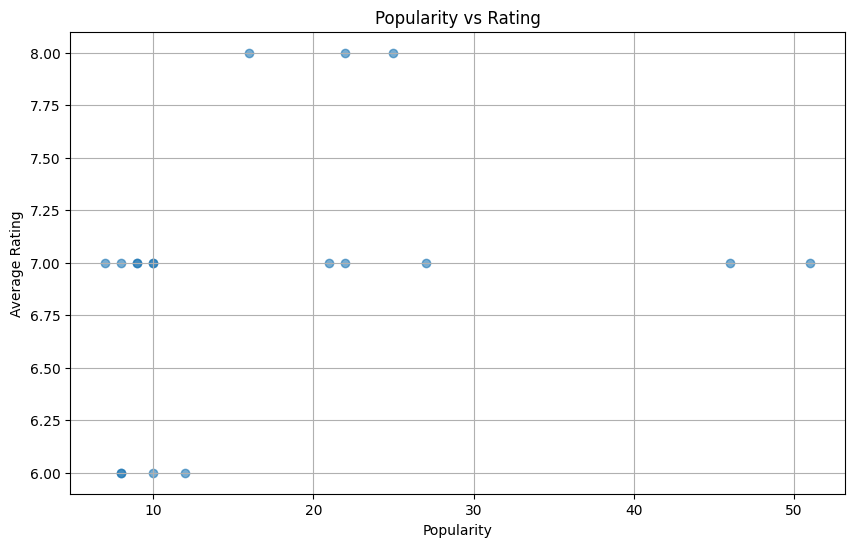

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(wanted_data['popularity'], wanted_data['vote_average'], alpha=0.6)
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.title('Popularity vs Rating')
plt.grid(True)
plt.show()


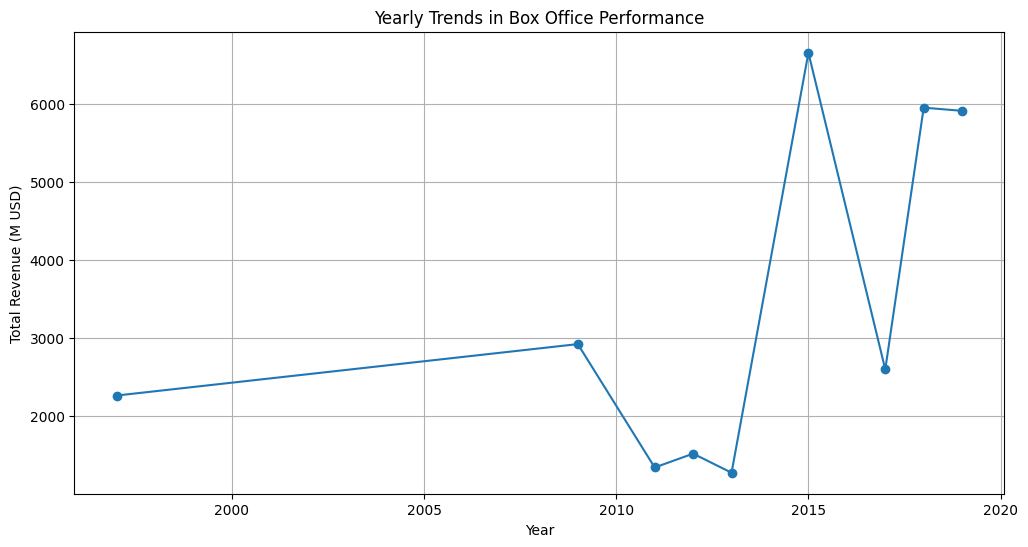

In [32]:
# Convert release_date to datetime if not already
wanted_data['year'] = wanted_data['release_date'].dt.year

yearly_revenue = wanted_data.groupby('year')['revenue_musd_num'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(yearly_revenue['year'], yearly_revenue['revenue_musd_num'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Revenue (M USD)')
plt.title('Yearly Trends in Box Office Performance')
plt.grid(True)
plt.show()


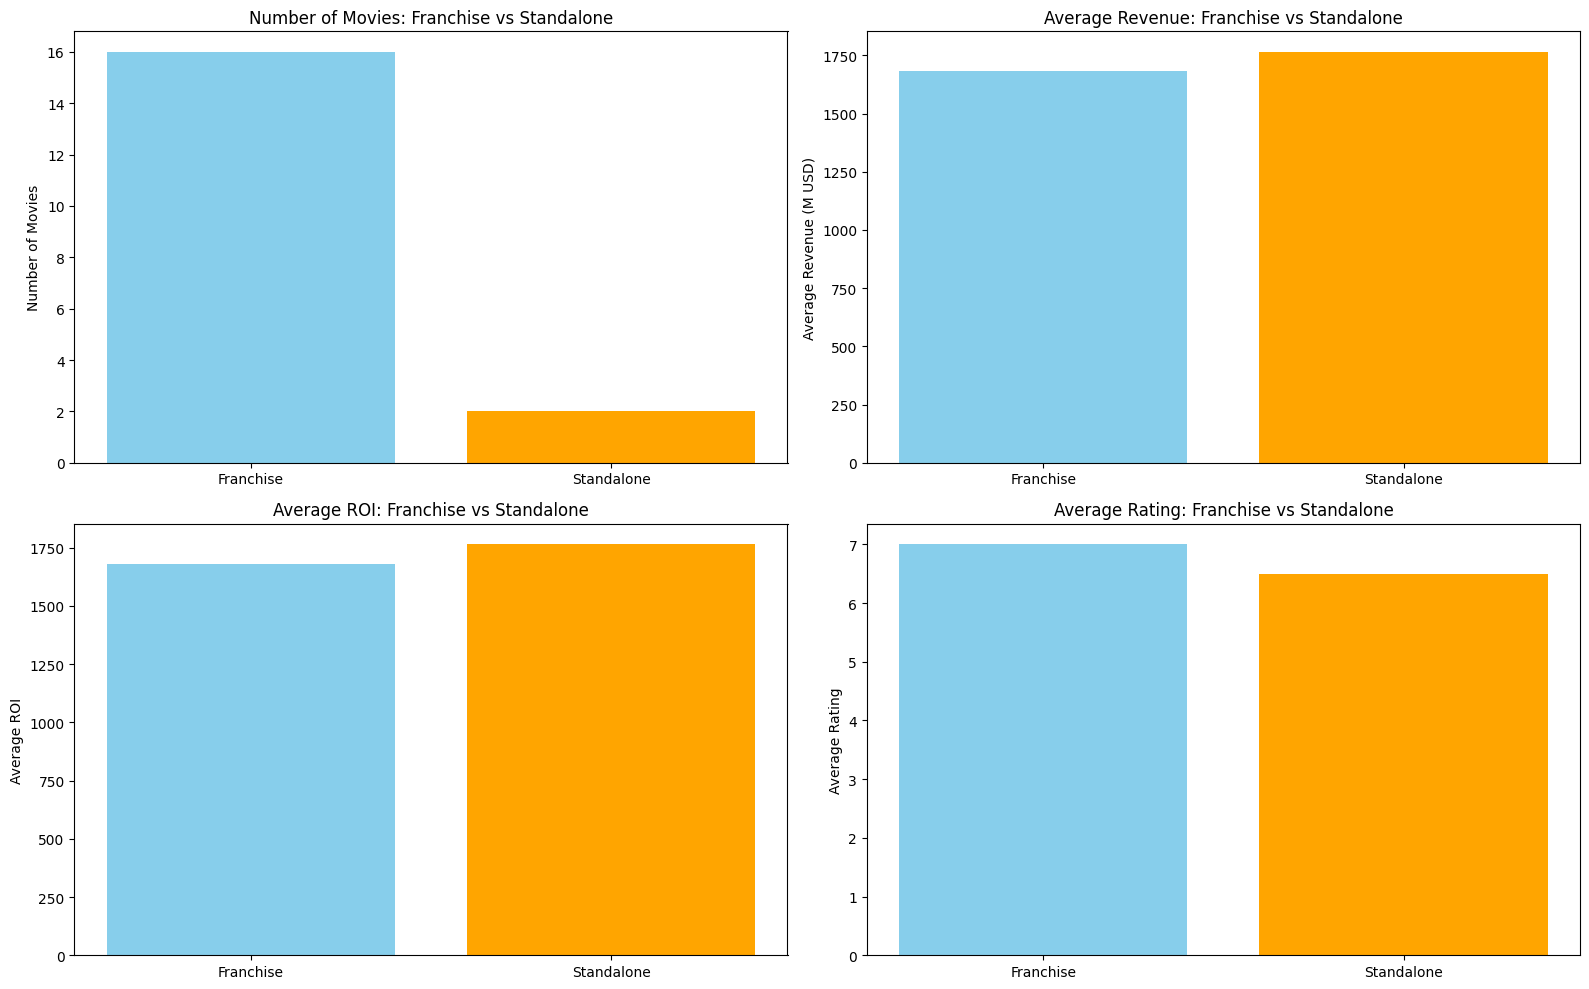

In [33]:
# Label movies as Franchise or Standalone
wanted_data['movie_type'] = wanted_data['belongs_to_collection'].apply(
    lambda x: 'Franchise' if pd.notna(x) else 'Standalone'
)

# Calculate metrics
num_movies = wanted_data['movie_type'].value_counts()
avg_revenue = wanted_data.groupby('movie_type')['revenue_musd_num'].mean()
avg_roi = wanted_data.groupby('movie_type')['roi'].mean()
avg_rating = wanted_data.groupby('movie_type')['vote_average'].mean()

# Ensure Franchise is first, Standalone second
num_movies = num_movies.loc[['Franchise','Standalone']]
avg_revenue = avg_revenue.loc[['Franchise','Standalone']]
avg_roi = avg_roi.loc[['Franchise','Standalone']]
avg_rating = avg_rating.loc[['Franchise','Standalone']]


plt.figure(figsize=(16,10))

# 1. Number of Movies
plt.subplot(2,2,1)
plt.bar(num_movies.index, num_movies.values, color=['skyblue','orange'])
plt.ylabel('Number of Movies')
plt.title('Number of Movies: Franchise vs Standalone')

# 2. Average Revenue
plt.subplot(2,2,2)
plt.bar(avg_revenue.index, avg_revenue.values, color=['skyblue','orange'])
plt.ylabel('Average Revenue (M USD)')
plt.title('Average Revenue: Franchise vs Standalone')

# 3. Average ROI
plt.subplot(2,2,3)
plt.bar(avg_roi.index, avg_roi.values, color=['skyblue','orange'])
plt.ylabel('Average ROI')
plt.title('Average ROI: Franchise vs Standalone')

# 4. Average Rating
plt.subplot(2,2,4)
plt.bar(avg_rating.index, avg_rating.values, color=['skyblue','orange'])
plt.ylabel('Average Rating')
plt.title('Average Rating: Franchise vs Standalone')

plt.tight_layout()
plt.show()
